# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4/2021-11-17_19-34-49"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,17/11/2021_19:34:52,528,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.31,24.75,24.62,34.50,24.75,Prendido
1,17/11/2021_19:34:58,532,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.31,24.75,24.56,34.75,24.81,Prendido
2,17/11/2021_19:35:03,537,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.31,24.75,24.62,34.94,24.75,Prendido
3,17/11/2021_19:35:09,544,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.31,24.75,24.56,35.06,24.75,Prendido
4,17/11/2021_19:35:15,548,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.25,24.75,24.62,35.31,24.75,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,17/11/2021_19:44:03,676,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.56,25.12,24.87,46.19,25.06,Prendido
95,17/11/2021_19:44:09,676,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.56,25.19,24.87,46.31,25.06,Prendido
96,17/11/2021_19:44:15,677,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.62,25.19,24.87,46.44,25.06,Prendido
97,17/11/2021_19:44:20,679,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.62,25.19,24.87,46.50,25.06,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

17/11/2021_19:34:52


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

237


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [8]:
#co2[np.where(co2 == "!Warning: Clearing Byte: 154")[0][0]] = -1
#co2[np.where(co2 == "!Warning: Clearing Byte: 49")[0][0]] = -1

In [9]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

<IPython.core.display.Javascript object>


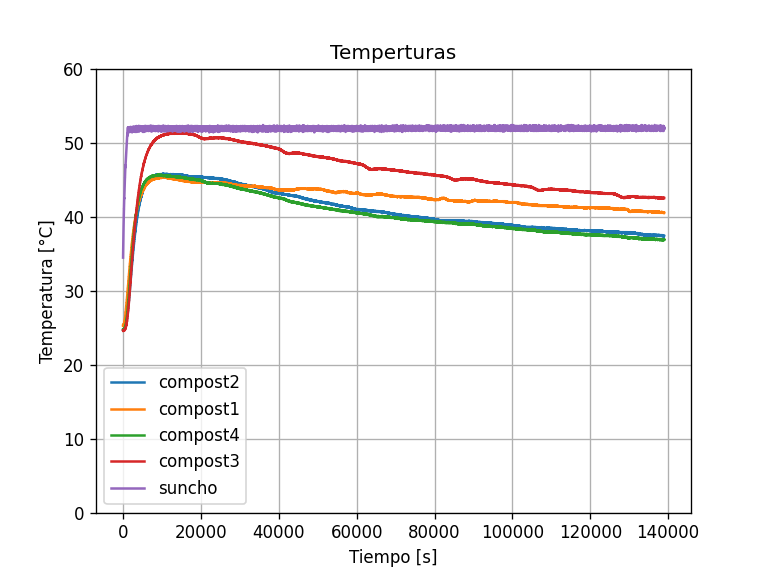

In [10]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,60)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

<IPython.core.display.Javascript object>


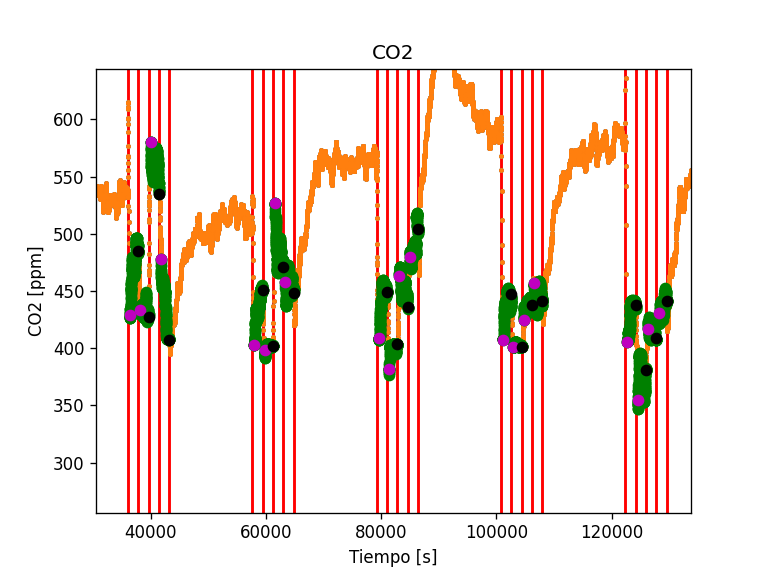

In [11]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

# Integración

In [12]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
        fin.append(pos[i + 1])

In [13]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)
plt.show()

In [14]:
# Ahora si, calculo el área:
areas = []
for j in range(len(inicio)):
    area = []
    for i in range(inicio[j], fin[j]):
        area.append((co2[i + 1] + co2[i]) / 2 * (tiempos[i + 1] - tiempos[i]))
    areas.append(area)
        
print(areas)

[[2973.0, 2979.0, 2985.0, 2988.0, 2988.0, 2490.0, 2991.0, 3000.0, 3006.0, 3012.0, 3015.0, 3015.0, 3021.0, 2522.5, 3030.0, 3030.0, 3036.0, 3042.0, 3048.0, 3051.0, 2540.0, 3051.0, 3051.0, 3048.0, 3045.0, 3042.0, 3042.0, 3042.0, 2535.0, 3042.0, 3042.0, 3042.0, 3042.0, 3042.0, 3045.0, 2537.5, 3042.0, 3042.0, 3045.0, 3054.0, 3057.0, 3057.0, 2550.0, 3063.0, 3069.0, 3075.0, 3075.0, 3075.0, 3078.0, 3078.0, 2562.5, 3075.0, 3081.0, 3090.0, 3093.0, 3090.0, 3090.0, 2577.5, 3102.0, 3111.0, 3114.0, 3114.0, 3114.0, 3117.0, 3117.0, 2597.5, 3120.0, 3123.0, 3129.0, 3132.0, 3132.0, 3135.0, 2617.5, 3141.0, 3141.0, 3147.0, 3144.0, 3138.0, 3141.0, 3141.0, 2615.0, 3144.0, 3147.0, 3144.0, 3144.0, 3141.0, 3135.0, 2610.0, 3132.0, 3132.0, 3132.0, 3129.0, 3120.0, 3111.0, 2590.0, 3108.0, 3108.0, 3108.0, 3105.0, 3102.0, 3099.0, 3096.0, 2580.0, 3096.0, 3102.0, 3111.0, 3114.0, 3114.0, 3114.0, 2595.0, 3108.0, 3105.0, 3114.0, 3120.0, 3117.0, 3111.0, 3108.0, 2592.5, 3114.0, 3120.0, 3129.0, 3129.0, 3129.0, 3132.0, 2610.0

[988622.0, 588057.0, 972611.0, 637989.5, 1026005.5, 582982.5, 1286449.5, 603635.0, 1006854.5, 564848.0, 1602333.5, 585495.0, 1093228.5, 924567.5, 1522171.5, 1059540.5, 2338944.0, 932278.5, 3925049.5, 905805.5, 1885632.5, 825351.5, 3323029.5, 868526.5, 1497286.0, 719544.5, 2353336.0, 758893.5, 1230042.0, 621363.5, 1809345.0, 618836.0, 938509.5, 452457.5, 1198103.0, 576142.5, 807984.0, 407495.0, 1018620.0, 542761.0, 699564.0, 372488.5, 884154.0, 519564.0]

In [15]:
'''
#Reordeno

area1 = []
area2 = []
area3 = []
area4 = []

for i in range(int(len(area) / 4)):
    area1.append(area[4 * i])
    area2.append(area[4 * i + 1])
    area3.append(area[4 * i + 2])
    area4.append(area[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(area1)))+1,1),area1,area2,area3,area4]))
np.savetxt(f'{PATH}/figuras/area_{fecha}.csv', a, delimiter=', ', newline='\n', header='nro,Area1,Area2,Area3,Area4')
'''

for i in range(len(areas)):
    if i % 4 == 0:
        area1 = areas[i]
    elif i % 4 == 1:
        area2 = areas[i]
    elif i % 4 == 3:
        area3 = areas[i]
    else:
        area4 = areas[i]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [16]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [17]:
gramos(np.array(area1))

array([1.19255822e-04, 1.19403052e-04, 1.19550281e-04, 1.19550281e-04,
       1.19550281e-04, 9.96252342e-05, 1.19550281e-04, 1.19697510e-04,
       1.19844740e-04, 1.19844740e-04, 1.19844740e-04, 1.19844740e-04,
       9.99933078e-05, 1.20139199e-04, 1.20139199e-04, 1.20139199e-04,
       1.20286428e-04, 1.20433658e-04, 1.20433658e-04, 1.20433658e-04,
       1.00361381e-04, 1.20433658e-04, 1.20433658e-04, 1.20433658e-04,
       1.20580887e-04, 1.21022575e-04, 1.21611493e-04, 1.01465602e-04,
       1.21611493e-04, 1.21611493e-04, 1.21611493e-04, 1.21611493e-04,
       1.21611493e-04, 1.21611493e-04, 1.01342911e-04, 1.21758722e-04,
       1.21758722e-04, 1.21611493e-04, 1.21464263e-04, 1.21464263e-04,
       1.21611493e-04, 1.21758722e-04, 1.01465602e-04, 1.21611493e-04,
       1.21317034e-04, 1.21022575e-04, 1.21317034e-04, 1.21758722e-04,
       1.21905952e-04, 1.01588293e-04, 1.21905952e-04, 1.22053181e-04,
       1.22347640e-04, 1.22642099e-04, 1.22789328e-04, 1.22789328e-04,
      